In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

In [15]:
df_log = pd.read_csv('sinr_drop_log.csv')
df_log.head()

,30.325775943949,17.745,aodv::Rreq,148,326,669.277,692.556,0
0,30.325776,6.99637,aodv::Rreq,148,515,699.390,698.578,0
1,30.325776,7.83133,aodv::Rreq,148,169,677.437,717.805,0
2,30.325776,5.16091,aodv::Rreq,148,578,714.000,692.000,0
3,30.325776,10.00780,aodv::Rreq,148,471,660.090,550.849,0
4,30.325776,15.02750,aodv::Rreq,148,269,551.208,620.630,0


In [16]:
df_log.columns = ['Time', 'SINR', 'Packet', 'Rx', 'Tx', 'x', 'a', 'z']
df_log.head()

,Time,SINR,Packet,Rx,Tx,x,a,z
0,30.325776,6.99637,aodv::Rreq,148,515,699.390,698.578,0
1,30.325776,7.83133,aodv::Rreq,148,169,677.437,717.805,0
2,30.325776,5.16091,aodv::Rreq,148,578,714.000,692.000,0
3,30.325776,10.00780,aodv::Rreq,148,471,660.090,550.849,0
4,30.325776,15.02750,aodv::Rreq,148,269,551.208,620.630,0


In [65]:
import pandas as pd

df = pd.read_csv("sinr_drop_log.csv", names=["Time", "SINR", "Packet", "TX", "RX", "X", "Y", "Z"])

# 패킷 타입별 카운트
counts = df["Packet"].value_counts()
print(counts)

# 중요 패킷만 필터링
important = df[df["Packet"].str.contains("RREQ|RREP|DATA", case=False)]
print(f"\n중요 패킷 수신 실패 수: {len(important)} / 전체 {len(df)}")

# 퍼센트
drop_rate = len(important) / len(df) * 100
print(f"중요 패킷 Drop 비율: {drop_rate:.2f}%")


Packet
aodv::Rreq      305578
aodv::Rrep       36542
WlanAck          10719
arpREQ            6753
arpREPLY          3463
                 ...  
ping49-reply         1
ping80               1
ping332              1
ping63               1
ping6                1
Name: count, Length: 685, dtype: int64

중요 패킷 수신 실패 수: 342120 / 전체 400383
중요 패킷 Drop 비율: 85.45%


In [62]:
len(ep)

400382

In [17]:
df_log.rename(columns={'Rx':'Tx_ID', 'Tx':'Rx_ID', 'a' : 'y'}, inplace=True)
df_log.head()

,Time,SINR,Packet,Tx_ID,Rx_ID,x,y,z
0,30.325776,6.99637,aodv::Rreq,148,515,699.390,698.578,0
1,30.325776,7.83133,aodv::Rreq,148,169,677.437,717.805,0
2,30.325776,5.16091,aodv::Rreq,148,578,714.000,692.000,0
3,30.325776,10.00780,aodv::Rreq,148,471,660.090,550.849,0
4,30.325776,15.02750,aodv::Rreq,148,269,551.208,620.630,0


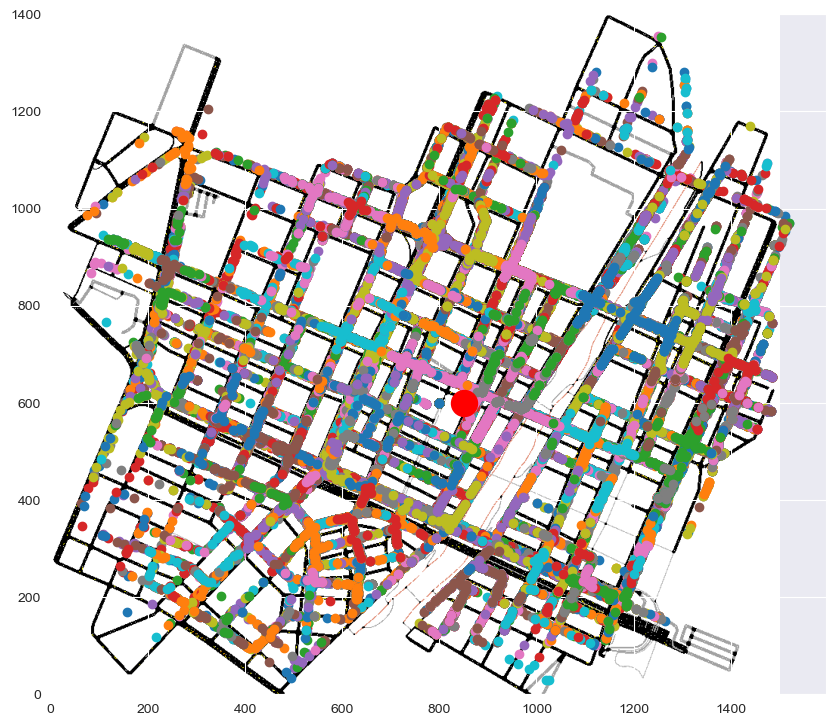

In [51]:
node_freq = {}

for tx, x, y in df_log[['Tx_ID', 'x', 'y']].values :
    if node_freq.get(tx) is None :
        node_freq[tx] = [1, {0 : [float(x), float(y)]}]
    else :
        node_freq[tx][1][node_freq[tx][0]] = [float(x), float(y)]
        node_freq[tx][0] += 1

plt.figure(figsize=(10,10))
bg = img.imread('background.png')
plt.imshow(bg, extent=(0,1500,0,1400), origin='lower')

for i in node_freq.keys() :
    plt.scatter([float(v[0]) for v in node_freq.get(i)[1].values()], [float(v[1]) for v in node_freq.get(i)[1].values()])
plt.scatter(850, 600, s=350, color='red')

plt.show()